<a href="https://colab.research.google.com/github/joedapotato/DS1002/blob/main/Lab_FTX_DS1001_Joe_Liang_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [77]:
# List group members (if applicable). Identify names and computing IDs
#
# Joe Liang                    abs9sn

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [78]:
import pandas as pd
import numpy as np
import datetime as dt

ftx = pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv',sep=';')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [79]:
ftx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   741 non-null    object 
 1   timeClose  741 non-null    object 
 2   timeHigh   741 non-null    object 
 3   timeLow    741 non-null    object 
 4   open       741 non-null    float64
 5   high       741 non-null    float64
 6   low        741 non-null    float64
 7   close      741 non-null    float64
 8   volume     741 non-null    float64
 9   marketCap  741 non-null    float64
 10  timestamp  741 non-null    object 
dtypes: float64(6), object(5)
memory usage: 63.8+ KB


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [80]:
ftx= ftx.dropna()
ftx = ftx.drop_duplicates()
ftx['timestamp'] = pd.to_datetime(ftx.timestamp).dt.strftime('%m-%d-%Y')

ftx = ftx.drop(['timeOpen','timeClose','timeHigh','timeLow','marketCap'],axis=1).iloc[::-1]

Now display the first 10 rows of the cleaned dataset.

In [81]:
ftx.head(10)

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,3.104665e+07,01-03-2021
738,6.948680,7.632146,6.358218,7.514079,4.052611e+07,01-04-2021
737,7.528216,8.714947,7.081120,8.664688,4.947928e+07,01-05-2021
736,8.671285,9.390797,8.425946,9.390797,3.140463e+07,01-06-2021
735,9.386493,10.004872,9.215244,9.562131,4.630334e+07,01-07-2021
734,9.569239,9.726429,8.452265,9.380988,4.228627e+07,01-08-2021
733,9.370450,9.636120,8.728044,9.570511,2.849895e+07,01-09-2021
732,9.571917,9.944797,8.657147,9.308809,3.101239e+07,01-10-2021
731,9.298315,9.298315,7.126050,8.610997,1.013024e+08,01-11-2021
730,8.615143,9.097479,8.040916,8.381133,2.674536e+07,01-12-2021


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [82]:
ftx['close_change'] = ftx['close'].diff()

In [83]:
ftx.head()

,open,high,low,close,volume,timestamp,close_change
739,6.201133,7.007523,6.171834,6.923968,31046652.87,01-03-2021,NaN
738,6.948680,7.632146,6.358218,7.514079,40526109.15,01-04-2021,0.590111
737,7.528216,8.714947,7.081120,8.664688,49479278.39,01-05-2021,1.150608
736,8.671285,9.390797,8.425946,9.390797,31404627.93,01-06-2021,0.726110
735,9.386493,10.004872,9.215244,9.562131,46303336.73,01-07-2021,0.171334


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [84]:
ftx['percentage_change'] = ftx['close'].pct_change()
ftx_top = ftx.sort_values('close_change',ascending=False)
ftx_top.loc[:,['percentage_change','timestamp']].head(10)

,percentage_change,timestamp
492,0.343825,09-01-2021
468,0.171197,09-16-2021
487,0.154220,09-06-2021
692,0.317665,02-19-2021
592,0.233981,05-24-2021
673,0.172786,03-09-2021
515,0.122230,08-09-2021
485,0.073852,09-08-2021
625,0.097146,04-26-2021
611,0.083101,05-05-2021


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [85]:
ftx['rate_of_change'] = ftx['close_change'].pct_change()
ftx = ftx.replace([np.inf,np.inf * -1],np.nan)
# ftx.head(30)

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [86]:
print(ftx.loc[:,['rate_of_change','timestamp']].sort_values('rate_of_change',ascending=True,).head(5))

     rate_of_change   timestamp
443     -262.744729  10-18-2021
190     -164.238246  06-28-2022
107     -111.945189  09-17-2022
132      -84.342694  08-23-2022
179      -50.514692  07-09-2022


In [87]:
print(ftx.loc[:,['rate_of_change','timestamp']].sort_values('rate_of_change',ascending=False).head(5))

     rate_of_change   timestamp
372      612.326740  12-28-2021
55       129.835551  11-08-2022
236      117.908853  05-13-2022
308       92.537644  03-03-2022
513       65.569141  08-11-2021


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

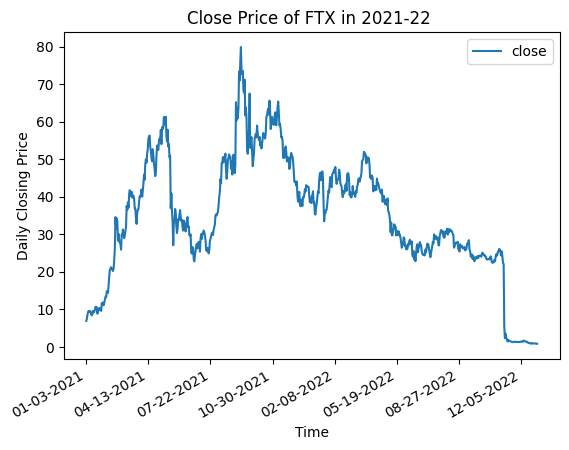

In [89]:
# sns.lineplot(ftx.loc[:,['close','timestamp']]).set(xlabel='Time',ylabel='Daily Closing Price')
ftx.plot(x='timestamp',y='close',xlabel='Time',ylabel='Daily Closing Price',title='Close Price of FTX in 2021-22 ')
plt.gcf().autofmt_xdate()
plt.show()

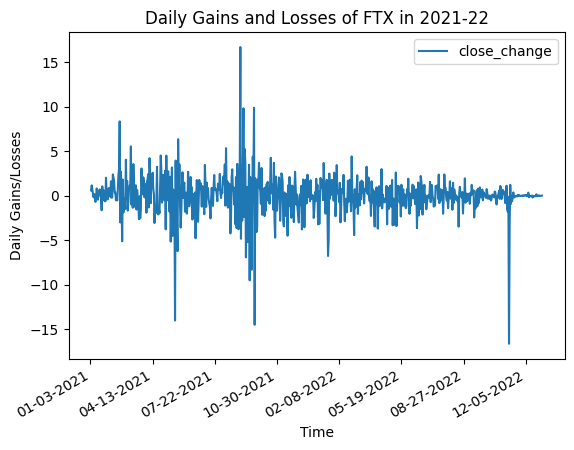

In [90]:
# sns.lineplot(ftx.loc[:,['close_change','timestamp']]).set(xlabel='Time',ylabel='Daily Gains/Losses')
ftx.plot(x='timestamp',y='close_change',xlabel='Time',ylabel='Daily Gains/Losses',title='Daily Gains and Losses of FTX in 2021-22')
plt.gcf().autofmt_xdate()
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

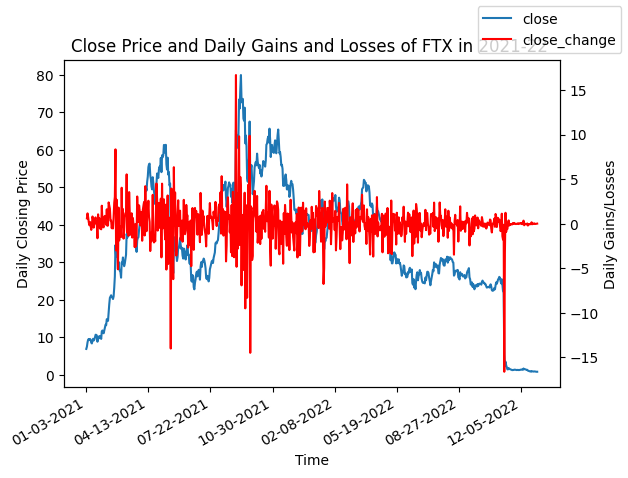

In [91]:
ax = ftx.plot(x = 'timestamp', y = 'close',title='Close Price and Daily Gains and Losses of FTX in 2021-22 ',xlabel='Time',ylabel='Daily Closing Price',legend=False)
ax2 = ax.twinx()
ftx.plot(x = 'timestamp', y = 'close_change',ax=ax2,color = 'red',legend=False,ylabel='Daily Gains/Losses')
ax.figure.legend()
plt.gcf().autofmt_xdate()
plt.show()